In [1]:
from ba_utils.metrics import ice, fid
from ba_utils.plot import plot_ice_batch, plot_fid_batch

import joblib
import os
import numpy as np

data_dir = 'data/dump/results/'
out = 'plt_out/results/plots/'
extension = '.pdf'

In [2]:
files = ['out4_semiautomatic.pkl', 'out5_semiautomatic.pkl']
images = [joblib.load(data_dir+file) for file in files]
np.array(images).shape

(2, 4, 50, 512, 512, 3)

In [3]:
for experiment_n, experiment in enumerate(images):
    break
    ices = [ice(seed) for seed in experiment]
    fids = [fid(seed) for seed in experiment]
    joblib.dump(ices, data_dir+f'ice{experiment_n+4}_auto.pkl')
    joblib.dump(fids, data_dir+f'fid{experiment_n+4}_auto.pkl')

In [4]:
ice_values = [joblib.load(data_dir+f'ice{experiment_n+4}_auto.pkl') for experiment_n in range(len(images))]
fid_values = [joblib.load(data_dir+f'fid{experiment_n+4}_auto.pkl') for experiment_n in range(len(images))]

ice_slerp =[joblib.load(data_dir+ 'ice42.pkl') , joblib.load(data_dir + 'ice52.pkl')]
fid_slerp =[joblib.load(data_dir+ 'fid42.pkl') , joblib.load(data_dir + 'fid52.pkl')]

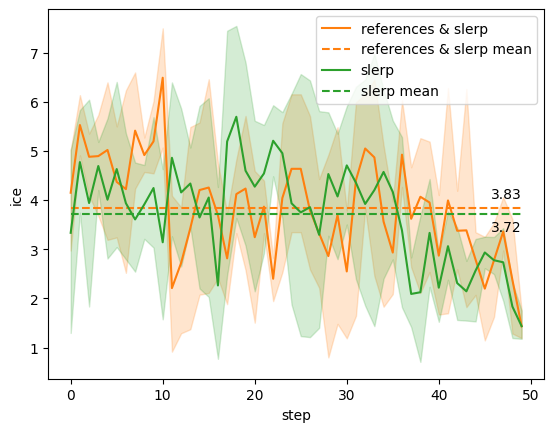

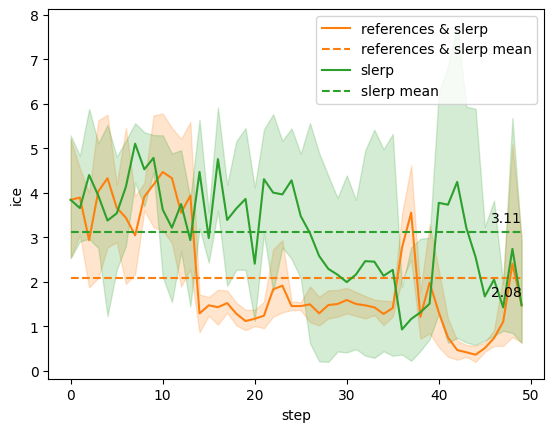

In [5]:
for i in range(len(ice_values)):
    plot_ice_batch([ice_values[i], ice_slerp[i]], method_names=['references & slerp', 'slerp'], color_offset=1, save=f'{out}ice{i+4}_auto'+extension)

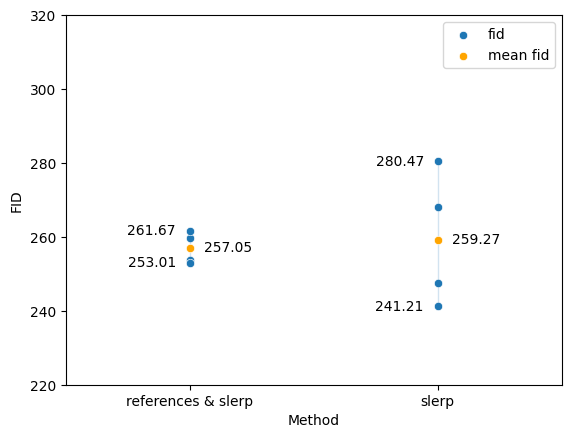

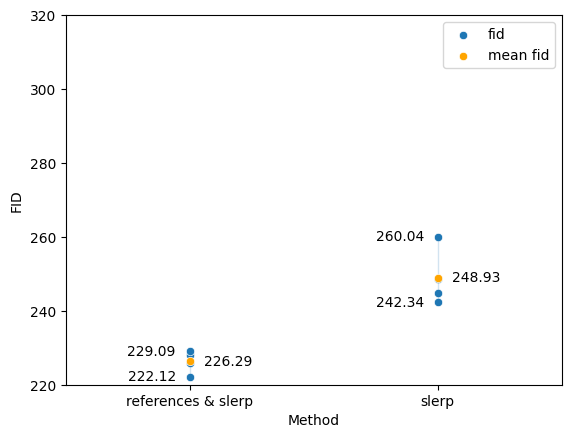

In [6]:
for i in range(len(fid_values)):
    plot_fid_batch([fid_values[i], fid_slerp[i]], method_names=['references & slerp', 'slerp'], save=f'{out}fid{i+4}_auto'+extension)